In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("../artifact/sentiment_analysis.csv")

In [16]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [17]:
data.shape

(7920, 3)

In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [20]:
import re
import string

In [21]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [22]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [23]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [24]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [25]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [26]:
def removePunctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text    

In [29]:
data["tweet"] = data["tweet"].apply(removePunctuations)

In [32]:
data["tweet"] = data["tweet"].str.replace(r'\d+','',regex=True)

In [33]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [35]:
%pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/42.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.5 MB 1.8 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 1.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------- --


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import nltk

In [37]:
nltk.download("stopwords",download_dir='../Static/Model')

[nltk_data] Downloading package stopwords to ../Static/Model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
with open('../Static/Model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [44]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [45]:
data['tweet']

0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

In [47]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [49]:
data['tweet'] = data['tweet'].apply(lambda x :' '.join(ps.stem(x) for x in x.split()))

In [50]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

### Building Vocabulary

In [56]:
from collections import Counter
vocab = Counter()

In [57]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [59]:
len(vocab)

15949

In [60]:
token = [key for key in vocab if vocab[key] > 10]

In [61]:
len(token)

1145

In [63]:
def save_vocabulary(lines,location):
    data = '\n'.join(lines)
    file = open(location,'w',encoding = 'utf-8')
    file.write(data)
    file.close()

save_vocabulary(token,'../Static/Model/vocabulary.txt')

### Divide Data

In [68]:
X = data['tweet']
y = data['label']

In [66]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.9 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.9 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.9 MB 2.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.9 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.9 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.9 MB 4.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.3/10.9 MB 6.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/10.9 MB 9.1 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size= 0.2) 

In [70]:
len(X_train)

6336

In [71]:
len(X_test)

1584

### Vectorization

In [79]:
def vectorizer(ds,vocabulary):
    vectorized_list = []

    for sentence in ds :
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    return np.asarray(vectorized_list,dtype=np.float32)

In [80]:
vectorized_X_train = vectorizer(X_train,token)

In [81]:
vectorized_X_test = vectorizer(X_test,token)

In [84]:
y_train.value_counts()

label
0    4716
1    1620
Name: count, dtype: int64

In [87]:
y_train.value_counts()


label
0    4716
1    1620
Name: count, dtype: int64

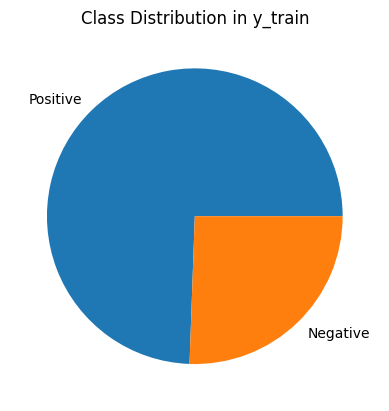

In [93]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.title('Class Distribution in y_train')
plt.show()

### Handle imbalance dataset

In [96]:
%pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/258.3 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote,y_train_smote = smote.fit_resample(vectorized_X_train,y_train)

In [101]:
y_train_smote.value_counts()

label
0    4716
1    4716
Name: count, dtype: int64

### Model Training

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [110]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Score: \n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tf1-score={f1}\n')

def validation_score(y_act,y_pred):
    acc = round(accuracy_score(y_act,y_pred),3)
    pr = round(precision_score(y_act,y_pred),3)
    rec = round(recall_score(y_act,y_pred),3)
    f1 = round(f1_score(y_act,y_pred),3)
    print(f'Training Score: \n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tf1-score={f1}\n')



#### Logistic Regression


In [106]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote,y_train_smote)

LogisticRegression()

In [107]:
y_train_pred = lr.predict(vectorized_X_train_smote)

In [111]:
training_score(y_train_smote,y_train_pred)

Training Score: 
	Accuracy=0.938
	Precision=0.914
	Recall=0.967
	f1-score=0.94



In [112]:
y_test_pred = lr.predict(vectorized_X_test)

In [113]:
validation_score(y_test,y_test_pred)

Training Score: 
	Accuracy=0.879
	Precision=0.723
	Recall=0.86
	f1-score=0.785



#### Naive bayes

In [115]:
nb = MultinomialNB()
nb.fit(vectorized_X_train_smote,y_train_smote)

#Model Testing 

y_train_pred = nb.predict(vectorized_X_train_smote)
training_score(y_train_smote,y_train_pred)

# Model Validation

y_test_pred = nb.predict(vectorized_X_test)
validation_score(y_test,y_test_pred)

Training Score: 
	Accuracy=0.902
	Precision=0.867
	Recall=0.95
	f1-score=0.907

Training Score: 
	Accuracy=0.867
	Precision=0.673
	Recall=0.933
	f1-score=0.782



#### DecisionTreeClassifier

In [120]:
DTC = DecisionTreeClassifier()
DTC.fit(vectorized_X_train_smote,y_train_smote)

# Model Testing

y_train_pred = DTC.predict(vectorized_X_train_smote)
training_score(y_train_smote,y_train_pred)

#Model Testing

y_test_pred = DTC.predict(vectorized_X_test)
validation_score(y_test,y_test_pred)

Training Score: 
	Accuracy=1.0
	Precision=1.0
	Recall=1.0
	f1-score=1.0

Training Score: 
	Accuracy=0.842
	Precision=0.693
	Recall=0.685
	f1-score=0.689



#### RandomForestClassifier

In [121]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_X_train_smote,y_train_smote)

# Model Testing

y_train_pred = rfc.predict(vectorized_X_train_smote)
training_score(y_train_smote,y_train_pred)

# Model Validation

y_test_pred = rfc.predict(vectorized_X_test)
validation_score(y_test,y_test_pred)

Training Score: 
	Accuracy=1.0
	Precision=1.0
	Recall=1.0
	f1-score=1.0

Training Score: 
	Accuracy=0.866
	Precision=0.747
	Recall=0.722
	f1-score=0.734



#### SVM

In [124]:
svc = SVC()
svc.fit(vectorized_X_train_smote,y_train_smote)

# Model Testing

y_train_pred = svc.predict(vectorized_X_train_smote)
training_score(y_train_smote,y_train_pred)

#Model Validation

y_test_pred = svc.predict(vectorized_X_test)
validation_score(y_test,y_test_pred)

Training Score: 
	Accuracy=0.978
	Precision=0.962
	Recall=0.996
	f1-score=0.979

Training Score: 
	Accuracy=0.871
	Precision=0.73
	Recall=0.791
	f1-score=0.759



#### Save Model

In [127]:
import pickle
with open('../Static/Model/model.pickle','wb') as file:
    pickle.dump(nb,file)